# L8. Local Search & CSPs

## Local Search Overview

The preceding algorithms systematically search the space of assignments of values to variables. If the space is finite, they will either find a solution or report that no solution exists.

Unfortunately, many spaces are too big for systematic search and are possibly even infinite. In any reasonable time, systematic search will have failed to consider enough of the space to give any meaningful results.

**Local search methods** start with a total assignment of a value to each variable and try to improve this assignment iteratively by taking improving steps

***Iterative best improvement*** is a local search algorithm that selects a variable and value that most improves some `evaluation function`.

If there are several possible successors that most improve the evaluation function, one is chosen at random.

When the aim is to `minimize a function`, this algorithm is called **greedy descent**.

When the aim is to `maximize a function`, this is called **hill climbing** or greedy ascent.

Iterative best improvement requires a `way to evaluate each total assignment`.

For constraint satisfaction problems, a common evaluation function is the `number of constraints that are violated`. A violated constraint is called a **conflict**.

With the evaluation function being the number of conflicts, a solution is a total assignment with an evaluation of zero. Sometimes this evaluation function is refined by weighting some constraints more than others.

### CSP Recall

Since "CSPs are a special kind of search problems" our `CSPBasic class` is a derived class from the `base Problem class`.

A `CSPBasic class` consists of all is CSP's inputs mentioned above.

The `__ _ init _ __` method parameters specify the CSP.

* `Variables` can be passed as a list of strings or integers.

* `Domains` are passed as dict where "key" specifies the variables and "value" specifies the domains.

The variables are passed as an empty list. Variables are extracted from the keys of the domain dictionary.

* `Neighbor` is a dict of variables that essentially describes the constraint graph. Here each variable key has a list of its values which are the variables that are constraint along with it.

* The `constraint parameter` should be a function *f(A, a, B, b)* that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b.

* We have additional parameters like `nassings` which is incremented each time an assignment is made when calling the `assign` method.

The `CSPBasic class` also supports data structures and methods that help you solve CSPs by calling a search function on the CSP.

In [1]:
from src.CSPclass import CSPBasic

In [2]:
help(CSPBasic.__init__)

Help on function __init__ in module src.CSPclass:

__init__(self, variables, domains, neighbors, constraints)
    Construct a CSP problem. If variables is empty, it becomes domains.keys().



Also we need to create the `CSP class` derived from `CSPBAsic`

In [3]:
from src.CSPclass import CSP

In [4]:
help(CSP.assign)

Help on function assign in module src.CSPclass:

assign(self, var, val, assignment)
    Add {var: val} to assignment; Discard the old value if any.



In [5]:
help(CSP.unassign)

Help on function unassign in module src.CSPclass:

unassign(self, var, assignment)
    Remove {var: val} from assignment.
    DO NOT call this if you are changing a variable to a new value;
    just call assign for that.



In [6]:
help(CSP.nconflicts)

Help on function nconflicts in module src.CSPclass:

nconflicts(self, var, val, assignment)
    Return the number of conflicts var=val has with other variables.



### Hill-Climbing Search

The hill-climbing search algorithm (or steepest-ascent) moves from the current state toward a neighboring state that increases the objective value. 

The algorithm does not maintain a search tree but only the states and the corresponding values of the objective. The *“greediness”* of hill-climbing makes it vulnerable to being trapped in *local maxima* (see figure below), as locally those points appear as *global maxima* to the algorithm, and *plateaux*. 

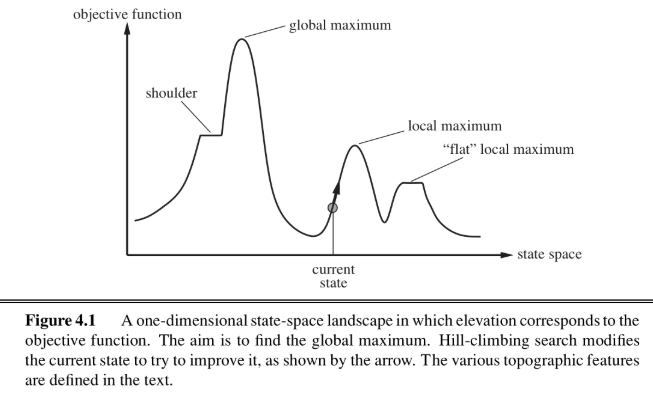


Plateaux can be categorized into “flat” areas at which no direction leads to improvement (“flat local maxima”) or flat areas from which progress can be slow (“shoulders”). 

Variants of hill-climbing, like stochastic hill-climbing, which selects an action randomly among the uphill moves, have been proposed. 

This version of hill-climbing has been shown in practice to converge to higher maxima at the cost of more iterations.

As the name suggests, the algorithm iteratively moves to a state with a higher objective value until no such progress is possible.

### Min-conflicts algorithm

As stated above, the` min_conflicts algorithm` is an efficient method to solve such a problem.

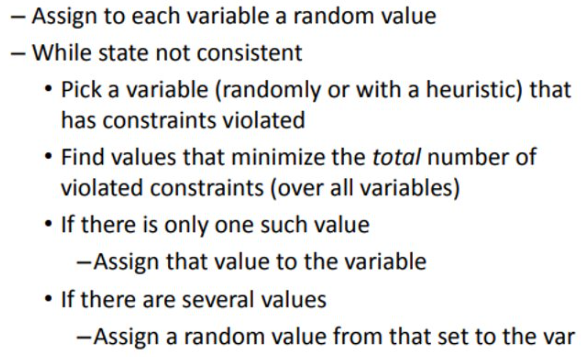

* In the start, all the variables of the CSP are randomly initialized.
* The algorithm then randomly selects a variable that has conflicts and violates some constraints of the CSP.
* The selected variable is then assigned a value that minimizes the number of conflicts.

This is a simple stochastic algorithm which *works on a principle similar to Hill-climbing*.

The conflicting state is repeatedly changed into a state with fewer conflicts in an attempt to reach an approximate solution.

#### Min_conflicts algorithm example

In [7]:
from src.utils import parse_neighbors

In [8]:
neighbors1 = parse_neighbors('X: Y; Y: Z')
domains1 = {'X': [4,5,6,7], 'Y': [4,5,6,8,9], 'Z':[3,5,6,7,9]}
constraints1 = lambda X, x, Y, y: x==y

neighbors1

defaultdict(list, {'X': ['Y'], 'Y': ['X', 'Z'], 'Z': ['Y']})

In [27]:
from src.CSPclass import CSP

In [23]:
#If variables is empty, it becomes domains.keys().
CSP1=CSP(variables=None,neighbors=neighbors1, domains=domains1, constraints=constraints1)

In [119]:
from src.algorithms import min_conflicts1

In [120]:
solution1=min_conflicts1(CSP1)

var X (val, nConflicts):
[(4, 0), (5, 0), (6, 0), (7, 0)]
The value 6 -> selected
var Y (val, nConflicts):
[(4, 1), (5, 1), (6, 0), (8, 1), (9, 1)]
The value 6 -> selected
var Z (val, nConflicts):
[(3, 1), (5, 1), (6, 0), (7, 1), (9, 1)]
The value 6 -> selected
Start with an arbitrary assignment: {'X': 6, 'Y': 6, 'Z': 6}
Step # 0


In [121]:
solution1

{'X': 6, 'Y': 6, 'Z': 6}

## Tasks - 25 points

You need to build a schedule for 4 courses:
1. *Practical Programming Methodology* (2 lec, 2 labs per week)
2. *Algorithms I* (2 lec, 1 lab per week)
3. *Operating Systems* (2 lec, 1 lab per week)
4. *Introduction to File and Database Management* (2 lec, 1 lab per week)

Courses could be on *Monday, Tuesday, Wednesday, Thursday* and *Friday*.

Each day of week has 3 time slots (*class1, class2, class3*)

There can't be 2 lectures on the same course on the same day, but there can be a lecture and a lab on the same course on the same day.

For example:

```
Wrong case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Mon, class3: Practical Programming Methodology - lec

Correct case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Mon, class3: Practical Programming Methodology - lab
```

There can't be 2 lectures on the same course on an adjacent day, but there can be a lecture and a lab on the same course on an adjacent day.
```
Wrong case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Tue, class1: Practical Programming Methodology - lec

Correct case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Tue, class1: Practical Programming Methodology - lab
```

There can't be 2 labs on the same course on an adjacent day.
```
Wrong case:
* Mon, class1: Practical Programming Methodology - lab
* Mon, class2: Algorithms I - lec
* Tue, class1: Practical Programming Methodology - lab
```

Example of solution:

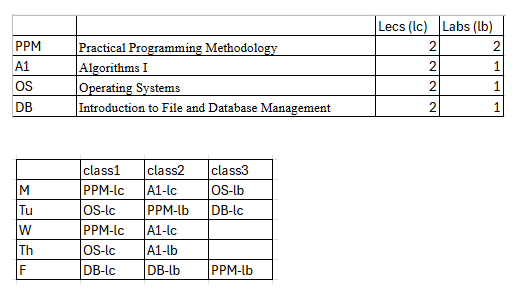

**Tasks:**
1. Formulate the problem (presented above) as a CSP problem. - 10 points
2. Develop CSP implementation (based on CSP class) - 10 points
3. Apply min_conflicts algorithm to solve the CSP. - 5 points
